In [ ]:
!pip install yfinance  # Instalar a biblioteca yfinance
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Obtendo dados de 1 ativo em um intervalo de tempo de 6 meses. 

In [ ]:
data = yf.download(['MELI34.SA'], start='2022-11-01', end='2023-05-02', group_by='ticker')

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-01,39.650002,40.689999,38.840000,39.400002,39.400002,894977
2022-11-03,36.880001,38.950001,36.200001,38.000000,38.000000,2363449
2022-11-04,39.310001,42.720001,38.599998,39.400002,39.400002,3006700
2022-11-07,39.900002,41.099998,39.669998,40.310001,40.310001,1726692
2022-11-08,40.520000,41.150002,39.240002,40.439999,40.439999,1130935


In [ ]:
acoes = ['MELI34.SA', 'U1BE34.SA', 'CYRE3.SA', 'PETR4.SA', 'ABEV3.SA', 'ECOR3.SA', 'SBSP3.SA', 'NFLX', 'USDBRL=X', 'ETH-USD']


In [ ]:
data_inicio = (datetime.now() - timedelta(days=180)).strftime('%Y-%m-%d')


Otendo os dados dos 10 ativos. 

In [ ]:
cagr = {}


In [ ]:
precos = yf.download(acoes, start=data_inicio, end=datetime.today().strftime('%Y-%m-%d'))['Adj Close']


[*********************100%***********************]  10 of 10 completed


In [ ]:
for acao in acoes:
    hist = yf.download(acao, start=data_inicio, end=datetime.today().strftime('%Y-%m-%d'))
    cagr[acao] = (hist['Adj Close'][-1] / hist['Adj Close'][0]) ** (6/12) - 1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
retornos = precos.pct_change().dropna()

In [ ]:
dias = len(retornos)
media_retornos = retornos.mean()
cov_retornos = retornos.cov()

In [ ]:
volatilidade_retornos = np.sqrt(np.diag(cov_retornos))

In [ ]:
limite_inferior = 0.0
limite_superior = 1.0

In [ ]:
x = cp.Variable(len(acoes))

In [ ]:
restricao_orcamento = [cp.sum(x) == 1]

In [ ]:
restricao_limites = [x >= limite_inferior, x <= limite_superior]

In [ ]:
riscos = volatilidade_retornos @ x


In [ ]:
funcao_objetivo = cp.quad_form(x, cov_retornos)


In [ ]:
problema = cp.Problem(cp.Minimize(funcao_objetivo), restricao_orcamento + restricao_limites + [riscos <= 0.02])


In [ ]:
problema.solve()


3.201823448683315e-05

In [ ]:
retorno_esperado = media_retornos @ x.value * dias


In [ ]:
volatilidade = np.sqrt(x.value @ cov_retornos @ x.value.T) * np.sqrt(dias)


In [ ]:
retornos_portfolio = (retornos @ x.value) * 100


In [ ]:
melhores_acoes = sorted(cagr.items(), key=lambda x: x[1], reverse=True)[:5]


In [ ]:
print("As melhores 5 ações com base no CAGR nos últimos 6 meses são:")
for acao, cagr in melhores_acoes:
    print(acao, " - CAGR:", cagr)

As melhores 5 ações com base no CAGR nos últimos 6 meses são:
MELI34.SA  - CAGR: 0.16861714105465242
U1BE34.SA  - CAGR: 0.154096956584163
NFLX  - CAGR: 0.11118196905627209
ETH-USD  - CAGR: 0.08164530055460362
ECOR3.SA  - CAGR: 0.048682549700529876


In [ ]:
desempenho = {}

In [ ]:
Sendo assim, a fórmula do CAGR é a seguinte:
CAGR = (VF / VI)1/n -1

In [ ]:
for acao in acoes:
    preco = yf.download(acao, period='6mo')['Close']
    desempenho[acao] = (preco[-1] - preco[0]) / preco[0] * 100

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(desempenho)

{'MELI34.SA': 32.15735451335793, 'U1BE34.SA': 31.225515733917725, 'CYRE3.SA': -16.268985177812155, 'PETR4.SA': -19.32862000289809, 'ABEV3.SA': -11.063833216341559, 'ECOR3.SA': 9.106524352900452, 'SBSP3.SA': -23.906121997404856, 'NFLX': 23.574515301325235, 'USDBRL=X': -2.2678874060605465, 'ETH-USD': 14.746273263926636}


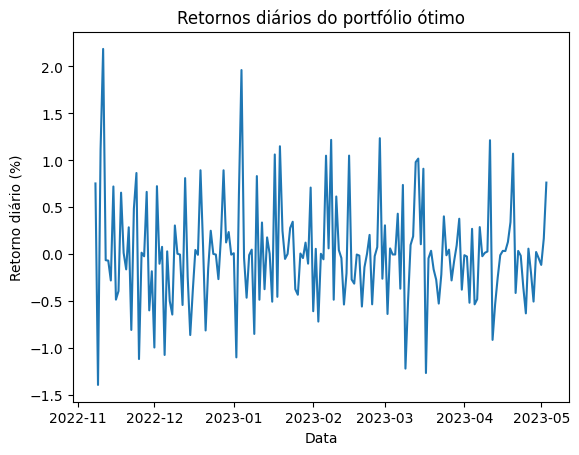

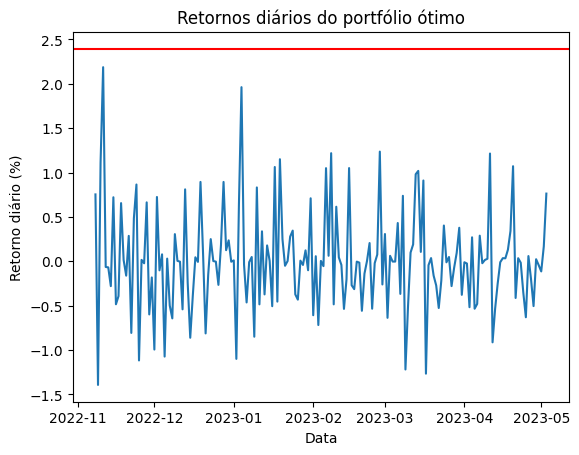

Alocações ótimas para cada ação:
MELI34.SA : 8.00%
Retorno médio: -0.03%
Volatilidade: 1.21%
U1BE34.SA : 4.91%
Retorno médio: -0.03%
Volatilidade: 2.59%
CYRE3.SA : 0.00%
Retorno médio: 0.09%
Volatilidade: 2.83%
PETR4.SA : 2.61%
Retorno médio: 0.17%
Volatilidade: 3.52%
ABEV3.SA : 9.07%
Retorno médio: 0.20%
Volatilidade: 2.27%
ECOR3.SA : 2.99%
Retorno médio: 0.14%
Volatilidade: 2.25%
SBSP3.SA : 1.96%
Retorno médio: 0.06%
Volatilidade: 1.98%
NFLX : 8.32%
Retorno médio: -0.13%
Volatilidade: 1.63%
USDBRL=X : 2.35%
Retorno médio: 0.20%
Volatilidade: 2.79%
ETH-USD : 59.79%
Retorno médio: -0.01%
Volatilidade: 0.80%

Métricas do portfólio ótimo:
Retorno esperado: 2.39%
Volatilidade: 7.53%
Risco: 1.31%


In [ ]:
plt.plot(retornos_portfolio)
plt.xlabel("Data")
plt.ylabel("Retorno diário (%)")
plt.title("Retornos diários do portfólio ótimo")
plt.show()

plt.plot(retornos_portfolio)
plt.xlabel("Data")
plt.ylabel("Retorno diário (%)")
plt.title("Retornos diários do portfólio ótimo")
plt.axhline(y=retorno_esperado * 100, color='r', linestyle='-')
plt.show()

print("Alocações ótimas para cada ação:")
for i, acao in enumerate(acoes):
    print(acao, ": %.2f%%" % (100 * x.value[i]))
    print("Retorno médio: %.2f%%" % (100 * media_retornos[i]))
    print("Volatilidade: %.2f%%" % (100 * volatilidade_retornos[i]))

print("\nMétricas do portfólio ótimo:")
print("Retorno esperado: %.2f%%" % (100 * retorno_esperado))
print("Volatilidade: %.2f%%" % (100 * volatilidade))
print("Risco: %.2f%%" % (100 * riscos.value))